In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('.//datasets//Mobile_Price_Classification.csv')
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
datatypes = dataset.dtypes
datatypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [5]:
cat_cols = []
num_cols = []
id1 = "id"

columns = dataset.columns
if id1 in dataset.columns:
    dataset.drop(id1,inplace=True,axis=1)

target_column = 'price_range'
for i in range(len(datatypes)):
    if datatypes.index[i] != target_column:
        if datatypes[i]=='object':
            unqval = dataset[datatypes.index[i]].nunique()
            if (unqval < 30):
                cat_cols.append(datatypes.index[i])
            else:
                del dataset[datatypes.index[i]]
                print('Deleted: ',datatypes.index[i])
        else:
            num_cols.append(datatypes.index[i])
num_cols

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [6]:
cat_cols

[]

In [7]:
cat_data = []
num_data = []
if(len(cat_cols)>0):
    cat_data = dataset[cat_cols]
if(len(num_cols)>0):
    num_data = dataset[num_cols]
y_data = dataset[target_column]

In [8]:
num_data,cat_data

(      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 0               842     0          2.2         0   1       0           7   
 1              1021     1          0.5         1   0       1          53   
 2               563     1          0.5         1   2       1          41   
 3               615     1          2.5         0   0       0          10   
 4              1821     1          1.2         0  13       1          44   
 ...             ...   ...          ...       ...  ..     ...         ...   
 1995            794     1          0.5         1   0       1           2   
 1996           1965     1          2.6         1   0       0          39   
 1997           1911     0          0.9         1   1       1          36   
 1998           1512     0          0.9         0   4       1          46   
 1999            510     1          2.0         1   5       1          45   
 
       m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_

In [9]:
if len(num_data):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
    imputer.fit(num_data.iloc[:,:].values)
    num_data = pd.DataFrame(imputer.transform(num_data.iloc[:,:].values))
    num_data.columns = num_cols
num_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0


In [10]:
if(len(cat_data)>0 and len(num_data)>0):
    print("1")
    df = pd.concat([num_data,cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
    df.isnull().sum()
elif(len(num_data) > 0):
    print("2")
    df = pd.concat([num_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
else:
    print("3")
    df = pd.concat([cat_data,y_data],axis=1)
    df = df.dropna().reset_index(drop=True)
(df)

2


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0


In [11]:
cat_data = df[cat_cols]
num_data = df[num_cols]
y_data = df[target_column]
df.drop(target_column,inplace=True,axis=1)
len(y_data)

2000

In [12]:
#if len(cat_cols):
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_encoded = pd.DataFrame(OH_encoder.fit_transform(df[cat_cols]))

# One-hot encoding removed index; put it back
X_encoded.index = df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X = df.drop(cat_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, X_encoded], axis=1)

In [13]:
OH_X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0


In [14]:
count = y_data.value_counts()
count
print(max(count))
print(min(count))
cond = min(count)/max(count)
print(cond)

500
500
1.0


In [15]:
from imblearn.over_sampling import ADASYN
from collections import Counter
if(cond<0.3):
    counter = Counter(y_data)
    print('before :',counter)
    ADA = ADASYN(random_state=130,sampling_strategy='minority')
    OH_X,y_data = ADA.fit_resample(OH_X,y_data)
    counter = Counter(y_data)
    print("after :",counter)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_x = StandardScaler()

In [18]:
OH_X = sc_x.fit_transform(OH_X)

In [19]:
OH_X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(OH_X,y_data,test_size=0.2,random_state=0)

[[91  4  0  0]
 [11 64 16  1]
 [ 1 21 68  9]
 [ 0  0 15 99]] No of Estimators:  10 0.805
[[ 92   3   0   0]
 [ 10  70  12   0]
 [  0  19  75   5]
 [  0   0  12 102]] No of Estimators:  15 0.8475
[[ 93   2   0   0]
 [ 10  69  13   0]
 [  0  17  73   9]
 [  0   0   8 106]] No of Estimators:  20 0.8525
[[ 93   2   0   0]
 [  5  74  13   0]
 [  0  19  72   8]
 [  0   0   7 107]] No of Estimators:  25 0.865
[[ 94   1   0   0]
 [  7  74  11   0]
 [  0  19  69  11]
 [  0   0   9 105]] No of Estimators:  50 0.855
[[ 94   1   0   0]
 [  7  74  11   0]
 [  0  17  72  10]
 [  0   0   8 106]] No of Estimators:  100 0.865
[[ 94   1   0   0]
 [  6  73  13   0]
 [  0  18  72   9]
 [  0   0   8 106]] No of Estimators:  200 0.8625


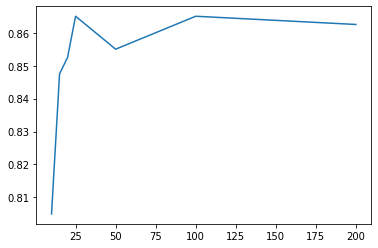

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
nodes = [10,15,20,25,50,100,200]
accuracy =[]
for node in nodes:    
    model = RandomForestClassifier(criterion = 'entropy', random_state=0, n_estimators=node)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    accs = accuracy_score(y_test,preds)
    accuracy.append(accs)
    print(confusion_matrix(y_test,preds),'No of Estimators: ', node,accs)

sns.lineplot(x=nodes,y=accuracy)

In [23]:
from xgboost import XGBClassifier   #XGBoostClassifier
classifier = XGBClassifier(max_depth=6)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Anaconda3\envs\tensorflow_en\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[ 94   1   0   0]
 [  3  82   7   0]
 [  0   7  82  10]
 [  0   0   6 108]]


0.915